# Trending YouTube Video Statistics EDA

#### In this notebook, we will analyse YouTube trending videos using the US dataset downloaded from Kaggle
#### https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv

### Loading libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_csv("USvideos.csv")

In [3]:
# Checking the file's shape
df.shape

(40949, 16)

#### We can see that the dataset has 40.949 observations and 16 variables

In [4]:
# Looking at the top 5 rows
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
# Checking columns datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

#### We can see that there are null values in the "description" column

In [6]:
# Missing values
df.dropna(inplace=True)

In [7]:
df.shape

(40379, 16)

#### Now we have 40.379 observations and 16 variables

In [8]:
# Counting unique values
df.nunique()

video_id                   6254
trending_date               205
title                      6357
channel_title              2142
category_id                  16
publish_time               6172
tags                       6008
views                     39927
likes                     29664
dislikes                   8460
comment_count             13684
thumbnail_link             6255
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [15]:
# Loading json with category names
newcategory = {}

with open('US_category_id.json') as json_file:
    datajson = json.load(json_file)
    for item in datajson['items']:
        newcategory[int(item['id'])] = item['snippet']['title']
        
newcategory

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [16]:
df['category_name'] = [newcategory[x] for x in df['category_id']]

In [17]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy


### Counting videos by category

In [18]:
# Count videos by category
df.category_name.value_counts()

Entertainment            9819
Music                    6437
Howto & Style            4140
Comedy                   3435
People & Blogs           3061
News & Politics          2409
Science & Technology     2361
Film & Animation         2340
Sports                   2125
Education                1642
Pets & Animals            916
Gaming                    803
Travel & Events           402
Autos & Vehicles          379
Shows                      57
Nonprofits & Activism      53
Name: category_name, dtype: int64

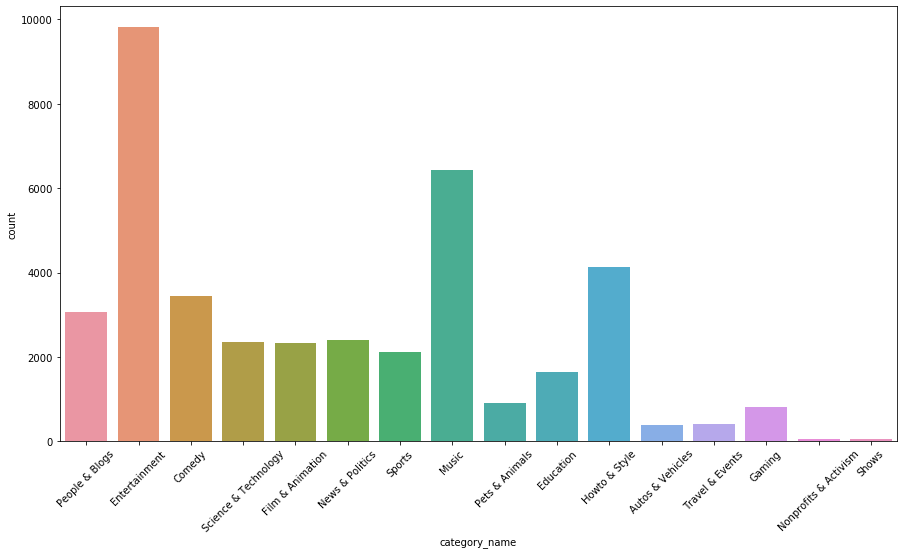

In [19]:
plt.figure(figsize = (15,8))
categorychart = sns.countplot(x='category_name',data = df)
tl = categorychart.set_xticklabels(categorychart.get_xticklabels(), rotation=45)

#### We can see that we more Entertainment and Music videos than Shows in this dataset

In [ ]:
# Showing top 15 most visualized videos (chart)

In [ ]:
# Showing top 15 most liked videos (chart)

In [ ]:
# Showing top 15 most disliked videos

In [ ]:
# Showing top 15 most commented videos

### Correlation between variables

In [20]:
mainvariables = ['views', 'likes', 'dislikes', 'comment_count']
corr = df[mainvariables].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.848746,0.558108,0.655819
likes,0.848746,1.000000,0.514691,0.853380
dislikes,0.558108,0.514691,1.000000,0.623131
comment_count,0.655819,0.853380,0.623131,1.000000


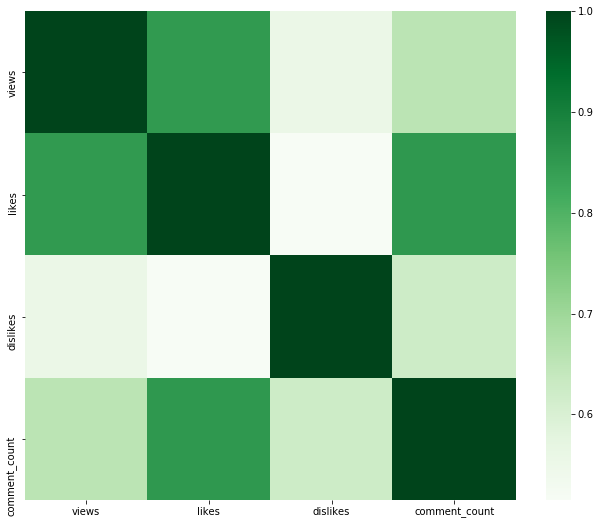

In [21]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sns.heatmap(corr, cmap="Greens")
plt.show()

In [31]:
sns.boxplot(df['category_name'], count()).set_title('Category names vs. Views')

NameError: name 'count' is not defined